In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from necklace_model import Necklace
from simulated_annealing import Annealer
%load_ext snakeviz

In [2]:
# Set the main variables
N = 100 # Number of temperatures
n = 100000 # Number of runs per temperature

### Problem 2a

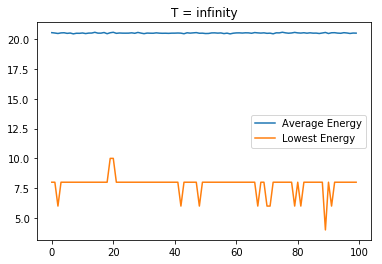

In [3]:
temps = np.repeat(np.inf,N)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSF = anl.run(n)
plt.plot(energyArr,label='Average Energy')
plt.plot(energyVBSF,label='Lowest Energy')
plt.legend()
plt.title('T = infinity')
plt.savefig('plots/problem2a.png')

### Problem 2b

 
*** Profile stats marshalled to file '/tmp/tmp2bar8o__'. 


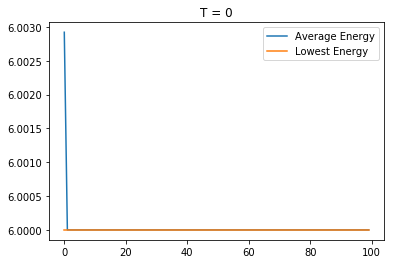

In [5]:
temps = np.repeat(0,N)
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr,label='Average Energy')
plt.plot(energyVBSFArr,label='Lowest Energy')
plt.legend()
plt.title('T = 0')
plt.savefig('plots/problem2b.png')

### Problem 2c
For this temperature schedule we need to set the constants $a, b$ within $T(t) = a * exp(-t/b)$. Therefore I used two equations. $$T(t=0) = 40 \qquad T(t=100) = 0.5$$

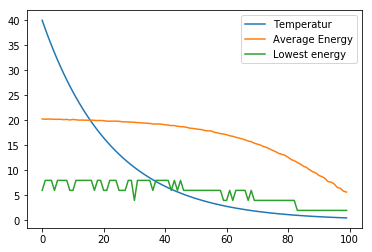

In [6]:
temps = np.linspace(0,100,100)
temps = 40*np.exp(temps*np.log(0.5/40)/100)
plt.plot(temps,label = 'Temperatur')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2c.png')

### Problem 2d
Again we use the boundaries to set the constants $a,b$ in $T(t) = a / (1+bt)$

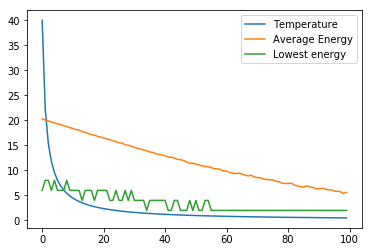

In [7]:
temps = np.linspace(0,100,100)
temps = 40/(1+39.5/50*temps)
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2d.png')

### Problem 2e

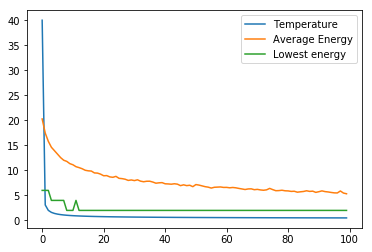

In [8]:
temps = np.linspace(0,100,100)
b = 79/np.log(101)
temps = 40/(1+b*np.log(temps+1))
plt.plot(temps,label = 'Temperature')
nkl = Necklace(20,2)
anl = Annealer()
anl.set_model(nkl)
anl.set_temps(temps)
energyArr,energyVBSFArr = anl.run(n)
plt.plot(energyArr, label = 'Average Energy')
plt.plot(energyVBSFArr, label='Lowest energy')
plt.legend()
plt.savefig('plots/problem2d.png')